<a href="https://colab.research.google.com/github/MarcosJSP/LEGO-BRICK-RECOGNITION/blob/master/Lego_Bricks_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEGO BRICKS RECOGNITION

Establecemos que nuestro input provendrade drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Comprobamos que estamos usando la gpu y que se pueden leer las imagenes.

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

'11214 Bush 3M friction with Cross axle'  '3024 Plate 1x1'
'18651 Cross Axle 2M with Snap friction'  '3040 Roof Tile 1x2x45deg'
'2357 Brick corner 1x2x2'		  '3069 Flat Tile 1x2'
'3003 Brick 2x2'			  '32123 half Bush'
'3004 Brick 1x2'			  '3673 Peg 2M'
'3005 Brick 1x1'			  '3713 Bush for Cross Axle'
'3022 Plate 2x2'			  '3794 Plate 1X2 with 1 Knob'
'3023 Plate 1x2'			  '6632 Technic Lever 3M'


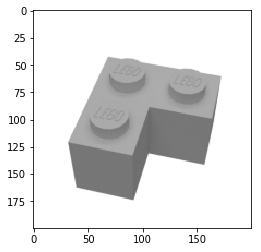

In [0]:
!ls "/content/drive/My Drive/datasets/LEGO brick images/train/"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image


pil_im = Image.open('/content/drive/My Drive/datasets/LEGO brick images/train/2357 Brick corner 1x2x2/201706171206-0001.png', 'r')
imshow(np.asarray(pil_im))

## Primer modelo

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 100

train_data_dir = '/content/drive/My Drive/datasets/LEGO brick images/train/'
validation_data_dir = '/content/drive/My Drive/datasets/LEGO brick images/valid/'

train_datagen = ImageDataGenerator(
                rescale=1./255,
                validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

history=model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=10,
)

Found 5104 images belonging to 16 classes.
Found 1275 images belonging to 16 classes.
Epoch 1/10
50/50 [==============================] - 19s 387ms/step - loss: 1.3566 - acc: 0.5728 - val_loss: 0.6940 - val_acc: 0.7360
Epoch 2/10
50/50 [==============================] - 18s 350ms/step - loss: 0.6246 - acc: 0.7849 - val_loss: 0.5870 - val_acc: 0.8000
Epoch 3/10
50/50 [==============================] - 18s 353ms/step - loss: 0.4296 - acc: 0.8481 - val_loss: 0.5767 - val_acc: 0.7949
Epoch 4/10
50/50 [==============================] - 18s 354ms/step - loss: 0.3364 - acc: 0.8776 - val_loss: 0.5150 - val_acc: 0.8328
Epoch 5/10
50/50 [==============================] - 18s 356ms/step - loss: 0.2602 - acc: 0.9020 - val_loss: 0.5824 - val_acc: 0.8270
Epoch 6/10
50/50 [==============================] - 18s 355ms/step - loss: 0.2071 - acc: 0.9176 - val_loss: 0.6334 - val_acc: 0.8328
Epoch 7/10
50/50 [==============================] - 18s 355ms/step - loss: 0.1723 - acc: 0.9286 - val_loss: 0.5646 -

## Analizamos los resultados

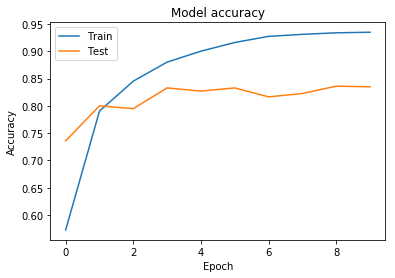

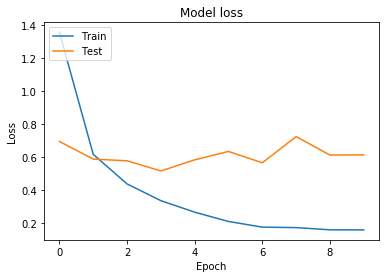

In [0]:
import matplotlib.pyplot as plt

#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Testeamos

{'11214 Bush 3M friction with Cross axle': 0, '18651 Cross Axle 2M with Snap friction': 1, '2357 Brick corner 1x2x2': 2, '3003 Brick 2x2': 3, '3004 Brick 1x2': 4, '3005 Brick 1x1': 5, '3022 Plate 2x2': 6, '3023 Plate 1x2': 7, '3024 Plate 1x1': 8, '3040 Roof Tile 1x2x45deg': 9, '3069 Flat Tile 1x2': 10, '32123 half Bush': 11, '3673 Peg 2M': 12, '3713 Bush for Cross Axle': 13, '3794 Plate 1X2 with 1 Knob': 14, '6632 Technic Lever 3M': 15}
prediction for brickcorner1x2x2:  2


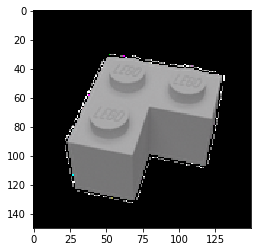

prediction for plate2x2:  6


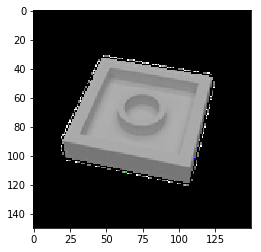

In [0]:
print(validation_generator.class_indices)

brickcorner1x2x2 = Image.open('/content/drive/My Drive/datasets/LEGO brick images/train/2357 Brick corner 1x2x2/201706171206-0001.png', 'r')
plate2x2 = Image.open('/content/drive/My Drive/datasets/LEGO brick images/train/3022 Plate 2x2/201706161906-0400.png', 'r')

brickcorner1x2x2 = brickcorner1x2x2.resize((150,150), Image.ANTIALIAS).convert("RGB")
plate2x2 = plate2x2.resize((150,150), Image.ANTIALIAS).convert("RGB")

data=list()
data.append(np.asarray(brickcorner1x2x2).reshape(1,150,150,3)/255)
data.append(np.asarray(plate2x2).reshape(1,150,150,3)/255)

imshow(brickcorner1x2x2)
print("prediction for brickcorner1x2x2: ", model.predict_classes([data[0]])[0])
plt.show()

imshow(plate2x2)
print("prediction for plate2x2: ",model.predict_classes([data[1]])[0])
plt.show()
